In [12]:
print("Importing libraries...")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")
print("TensorFlow Version:", tf.__version__)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

Importing libraries...
✓ Libraries imported successfully
TensorFlow Version: 2.19.0


In [13]:
print("\n" + "="*60)
print("LOADING DATA")
print("="*60)

# Load data (pastikan file titanic.csv sudah di-upload)
df = pd.read_csv('titanic.csv')
print(f"✓ Data loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())


LOADING DATA
✓ Data loaded: 891 rows × 12 columns

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123 


EXPLORATORY DATA ANALYSIS

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

------------------------------------------------------------
Statistik Deskriptif:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.

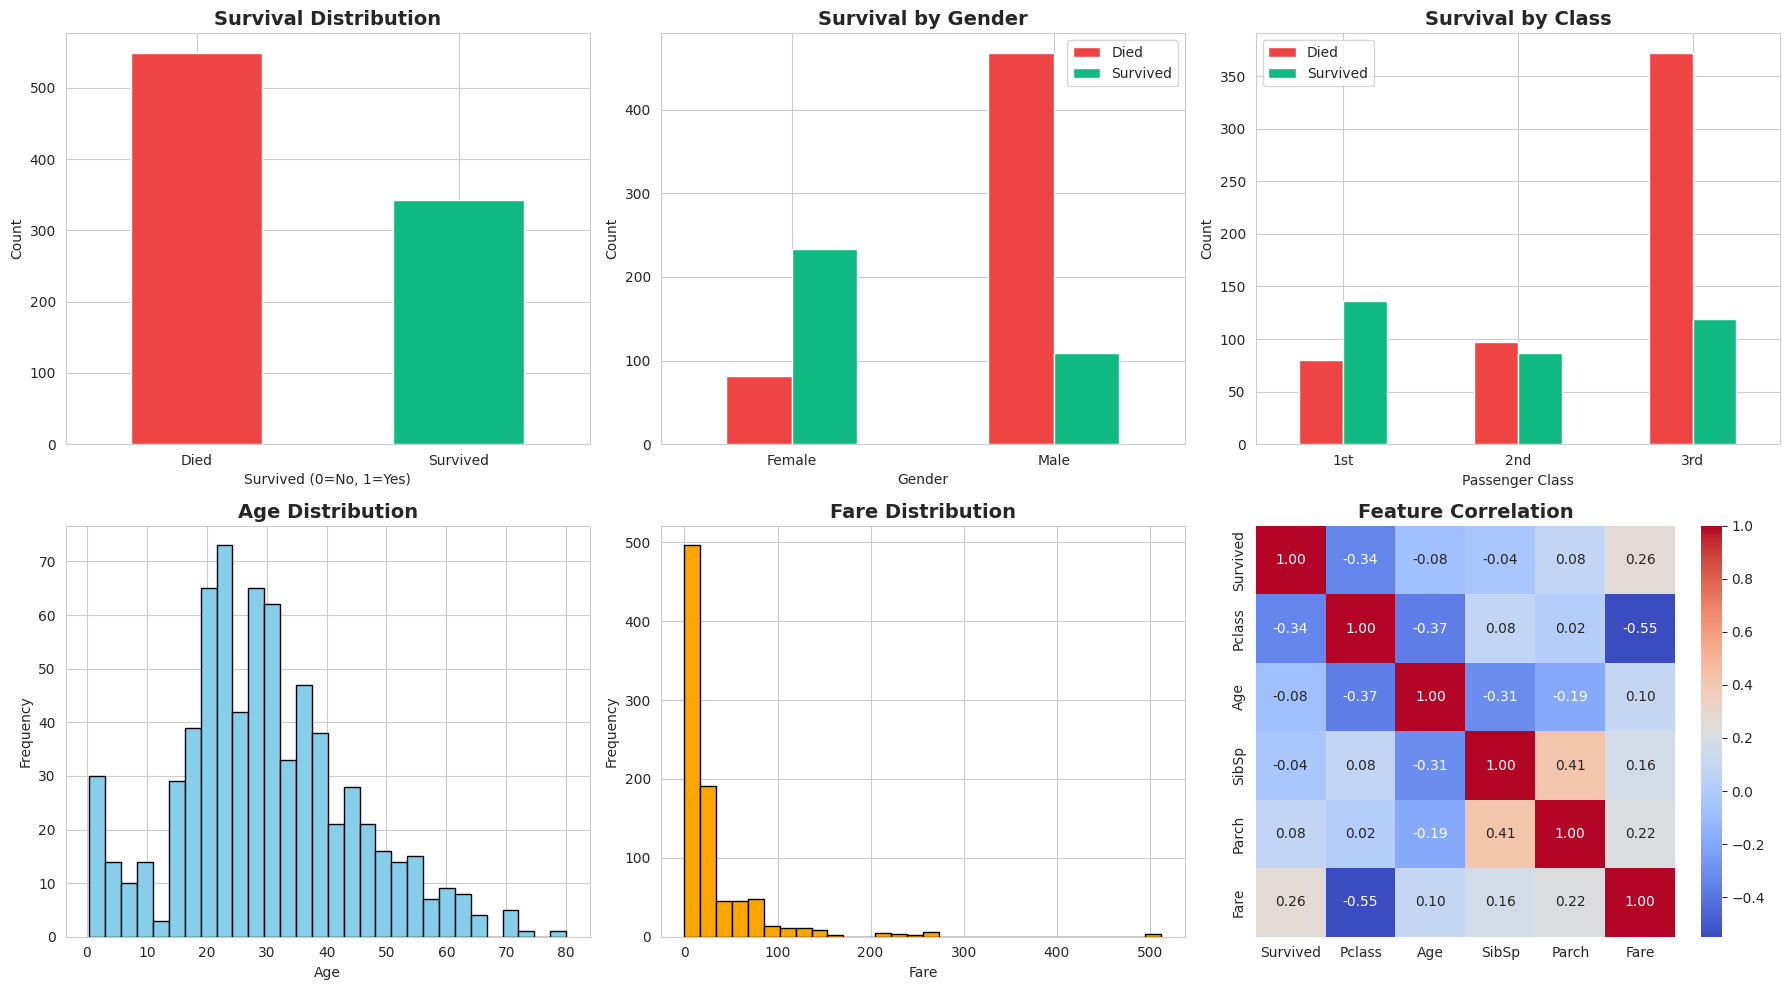

In [14]:
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Basic info
print("\nDataset Info:")
df.info()

print("\n" + "-"*60)
print("Statistik Deskriptif:")
print(df.describe())

print("\n" + "-"*60)
print("Missing Values:")
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct.round(2)
})
print(missing_df[missing_df['Missing Count'] > 0])

print("\n" + "-"*60)
print("Survival Rate:")
survival_counts = df['Survived'].value_counts()
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(f"Meninggal (0): {survival_counts[0]} orang ({survival_rate[0]:.2f}%)")
print(f"Selamat (1): {survival_counts[1]} orang ({survival_rate[1]:.2f}%)")

# Visualisasi
print("\nGenerating visualizations...")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Survival Count
df['Survived'].value_counts().plot(kind='bar', ax=axes[0,0], color=['#EF4444', '#10B981'])
axes[0,0].set_title('Survival Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Survived (0=No, 1=Yes)')
axes[0,0].set_ylabel('Count')
axes[0,0].set_xticklabels(['Died', 'Survived'], rotation=0)

# 2. Survival by Gender
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', ax=axes[0,1], color=['#EF4444', '#10B981'])
axes[0,1].set_title('Survival by Gender', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Count')
axes[0,1].legend(['Died', 'Survived'])
axes[0,1].set_xticklabels(['Female', 'Male'], rotation=0)

# 3. Survival by Class
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', ax=axes[0,2], color=['#EF4444', '#10B981'])
axes[0,2].set_title('Survival by Class', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Passenger Class')
axes[0,2].set_ylabel('Count')
axes[0,2].legend(['Died', 'Survived'])
axes[0,2].set_xticklabels(['1st', '2nd', '3rd'], rotation=0)

# 4. Age Distribution
df['Age'].dropna().hist(bins=30, ax=axes[1,0], color='skyblue', edgecolor='black')
axes[1,0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')

# 5. Fare Distribution
df['Fare'].hist(bins=30, ax=axes[1,1], color='orange', edgecolor='black')
axes[1,1].set_title('Fare Distribution', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')

# 6. Correlation Heatmap
correlation = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[1,2], fmt='.2f')
axes[1,2].set_title('Feature Correlation', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [15]:
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Copy data
data = df.copy()

# Feature Engineering
print("\nFeature Engineering...")

# 1. Family Size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
print("✓ Created FamilySize feature")

# 2. Is Alone
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
print("✓ Created IsAlone feature")

# 3. Title extraction from Name
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Group rare titles
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Mme': 'Mrs', 'Don': 'Rare', 'Dona': 'Rare',
    'Lady': 'Rare', 'Countess': 'Rare', 'Jonkheer': 'Rare', 'Sir': 'Rare',
    'Capt': 'Rare', 'Ms': 'Miss'
}
data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna('Rare')
print("✓ Extracted and grouped Title")

# Handle Missing Values
print("\nHandling Missing Values...")

# Age - fill with median by Pclass and Sex
for pclass in [1, 2, 3]:
    for sex in ['male', 'female']:
        mask = (data['Pclass'] == pclass) & (data['Sex'] == sex) & data['Age'].isnull()
        median_age = data[(data['Pclass'] == pclass) & (data['Sex'] == sex)]['Age'].median()
        data.loc[mask, 'Age'] = median_age
print("✓ Filled missing Age values")

# Embarked - fill with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
print("✓ Filled missing Embarked values")

# Fare - fill with median
data['Fare'].fillna(data['Fare'].median(), inplace=True)
print("✓ Filled missing Fare values")

# Drop columns not needed
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(drop_cols, axis=1, inplace=True)
print(f"✓ Dropped columns: {drop_cols}")

# Encode categorical variables
print("\nEncoding Categorical Variables...")
label_encoders = {}
categorical_cols = ['Sex', 'Embarked', 'Title']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    print(f"✓ Encoded {col}")

print("\nFinal Dataset Shape:", data.shape)
print("Final Features:", data.columns.tolist())


DATA PREPROCESSING

Feature Engineering...
✓ Created FamilySize feature
✓ Created IsAlone feature
✓ Extracted and grouped Title

Handling Missing Values...
✓ Filled missing Age values
✓ Filled missing Embarked values
✓ Filled missing Fare values
✓ Dropped columns: ['PassengerId', 'Name', 'Ticket', 'Cabin']

Encoding Categorical Variables...
✓ Encoded Sex
✓ Encoded Embarked
✓ Encoded Title

Final Dataset Shape: (891, 11)
Final Features: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']


In [16]:
print("\n" + "="*60)
print("PREPARING DATA FOR DEEP LEARNING")
print("="*60)

# Separate features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")



PREPARING DATA FOR DEEP LEARNING
Features shape: (891, 10)
Target shape: (891,)

Training set: 712 samples
Test set: 179 samples
✓ Features scaled using StandardScaler


In [17]:
print("\n" + "="*60)
print("BUILDING DEEP LEARNING MODELS")
print("="*60)

input_dim = X_train_scaled.shape[1]

# Model 1: Basic Neural Network
print("\n[Model 1] Basic Neural Network")
print("-" * 40)

model1 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='Basic_NN')

model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model1.summary())

# Model 2: Deep Neural Network with Batch Normalization
print("\n[Model 2] Deep Neural Network with BatchNorm")
print("-" * 40)

model2 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(input_dim,)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='Deep_NN')

model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model2.summary())

# Model 3: Optimized DNN with Learning Rate Scheduling
print("\n[Model 3] Optimized DNN with LR Scheduling")
print("-" * 40)

model3 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(input_dim,)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
], name='Optimized_DNN')

# Learning rate scheduler
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)

model3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model3.summary())


BUILDING DEEP LEARNING MODELS

[Model 1] Basic Neural Network
----------------------------------------


Model: "Basic_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

None

[Model 2] Deep Neural Network with BatchNorm
----------------------------------------


Model: "Deep_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,385 (189.00 KB)

 Trainable params: 47,489 (185.50 KB)

 Non-trainable params: 896 (3.50 KB)

None

[Model 3] Optimized DNN with LR Scheduling
----------------------------------------


Model: "Optimized_DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 512)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,761 (710.00 KB)

 Trainable params: 179,969 (703.00 KB)

 Non-trainable params: 1,792 (7.00 KB)

None


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LayerNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Fungsi bantu buat callback
def get_callbacks(name):
    return [
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, verbose=0)
    ]

In [24]:
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100, batch_size=32,
    verbose=0, callbacks=get_callbacks("Model1")
)
print("✅ Model 1 training done!")

✅ Model 1 training done!


In [25]:
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(), Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(), Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(), Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
               loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=150, batch_size=16,
    verbose=0, callbacks=get_callbacks("Model2")
)
print("✅ Model 2 training done!")


✅ Model 2 training done!


In [26]:
model3 = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],),
          kernel_regularizer=l1_l2(l1=0.0005, l2=0.001)),
    BatchNormalization(), Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.0005, l2=0.001)),
    LayerNormalization(), Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(), Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200, batch_size=32,
    verbose=0, callbacks=get_callbacks("Model3")
)
print("✅ Model 3 training done!")

✅ Model 3 training done!



Model 1: Basic NN

Confusion Matrix:
[[103   2]
 [ 72   2]]

Classification Report:
              precision    recall  f1-score   support

        Died       0.59      0.98      0.74       105
    Survived       0.50      0.03      0.05        74

    accuracy                           0.59       179
   macro avg       0.54      0.50      0.39       179
weighted avg       0.55      0.59      0.45       179

ROC-AUC: 0.5085
Accuracy: 0.5866 (58.66%)

Model 2: Deep NN

Confusion Matrix:
[[99  6]
 [71  3]]

Classification Report:
              precision    recall  f1-score   support

        Died       0.58      0.94      0.72       105
    Survived       0.33      0.04      0.07        74

    accuracy                           0.57       179
   macro avg       0.46      0.49      0.40       179
weighted avg       0.48      0.57      0.45       179

ROC-AUC: 0.5393
Accuracy: 0.5698 (56.98%)

Model 3: Optimized DNN

Confusion Matrix:
[[80 25]
 [53 21]]

Classification Report:
           

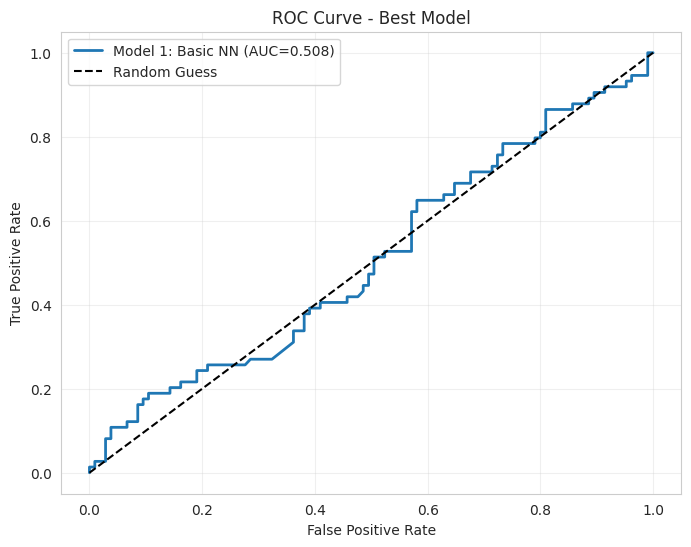

In [28]:
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

models_list = [
    ('Model 1: Basic NN', model1, history1),
    ('Model 2: Deep NN', model2, history2),
    ('Model 3: Optimized DNN', model3, history3)
]

results = []

for name, model, history in models_list:
    print(f"\n{'='*60}")
    print(f"{name}")
    print("="*60)

    y_pred_proba = model.predict(X_test_scaled, verbose=0).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)

    # Safe AUC (handle if only one class in y_pred_proba)
    try:
        auc = roc_auc_score(y_test, y_pred_proba)
    except ValueError:
        auc = np.nan

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Gunakan get() agar aman meski label hilang
    precision = report.get('1', {}).get('precision', 0)
    recall = report.get('1', {}).get('recall', 0)
    f1 = report.get('1', {}).get('f1-score', 0)

    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Died', 'Survived'], zero_division=0))
    print(f"ROC-AUC: {auc:.4f}" if not np.isnan(auc) else "ROC-AUC: N/A (only one class predicted)")
    print(f"Accuracy: {acc:.4f} ({acc*100:.2f}%)")

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': auc
    })

# Hasil tabel
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\n" + "="*60)
print("SUMMARY OF ALL MODELS")
print("="*60)
print(results_df.to_string(index=False))

# Pilih model terbaik
best_model_row = results_df.iloc[0]
best_model_name = best_model_row['Model']
best_model = [m for (n, m, h) in models_list if n == best_model_name][0]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_model_row['Accuracy']:.4f} ({best_model_row['Accuracy']*100:.2f}%)")

# ROC Curve jika memungkinkan
if not np.isnan(best_model_row['ROC-AUC']):
    y_pred_proba_best = best_model.predict(X_test_scaled, verbose=0).flatten()
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"{best_model_name} (AUC={roc_auc_score(y_test, y_pred_proba_best):.3f})", linewidth=2)
    plt.plot([0,1],[0,1],'k--',label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Best Model')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("\n⚠️ ROC Curve skipped: Model hanya memprediksi satu kelas.")